In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
# from transformers import AutoTokenizer, TFBertForSequenceClassification

2024-08-13 03:22:54.138783: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 03:22:54.220103: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 03:22:54.253053: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 03:22:54.262351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 03:22:54.321472: I tensorflow/core/platform/cpu_feature_guar

In [2]:

# Load data
train_data = pd.read_csv('data/sign_mnist_train.csv')
test_data = pd.read_csv('data/sign_mnist_test.csv')

# Explore data
print(train_data.head())
print(train_data.info())
print(test_data.head())
print(test_data.info())

# Preprocess data
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Check the shape of the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Assuming the images are 32x32 pixels
image_size = 32 * 32

# Verify the size
assert X_train.shape[1] == image_size, "Unexpected image size in the training set"
assert X_test.shape[1] == image_size, "Unexpected image size in the test set"

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN model
X_train = X_train.reshape(-1, 32, 32)
X_test = X_test.reshape(-1, 32, 32)

# Split data into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.4, random_state=42)

# Baseline model (simple DNN)
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(25, activation='softmax')  # Change the number of units to 25
])
baseline_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     157     157     157     157     157     158   
2      2     187     188     188     188     188     188     188     188   
3      2     211     211     212     212     212     212     212     212   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel1015  pixel1016  pixel1017  pixel1018  pixel1019  \
0     153  ...        207        207        207        207        206   
1     158  ...        149        163        175        175        175   
2     188  ...        202        201        200        199        199   
3     211  ...        235        234        233        231        230   
4     185  ...        133        163        163        163        164   

   pixel1020  pixel1021  pixel1022  pixel1023  pixel1024  
0        206        206        204        203

/home/thory/miniconda3/envs/small-projects-ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1723533780.149796    4223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723533780.217816    4223 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723533780.217911    4223 cuda_executor.cc:1015] successfu

In [3]:

# Train baseline model
history = baseline_model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


I0000 00:00:1723533784.906234    4690 service.cc:146] XLA service 0x76c420009780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723533784.906254    4690 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Ti, Compute Capability 8.9
2024-08-13 03:23:04.924106: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-13 03:23:04.998432: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-08-13 03:23:05.021778: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibil

332/858 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.1089 - loss: 3.0440

I0000 00:00:1723533785.617150    4690 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


838/858 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.2008 - loss: 2.6773

2024-08-13 03:23:06.192102: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_314', 8 bytes spill stores, 8 bytes spill loads



858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2038 - loss: 2.6654 - val_accuracy: 0.4723 - val_loss: 1.6708
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - accuracy: 0.5377 - loss: 1.4281 - val_accuracy: 0.5455 - val_loss: 1.3434
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.6720 - loss: 1.0211 - val_accuracy: 0.6023 - val_loss: 1.2181
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.7531 - loss: 0.7652 - val_accuracy: 0.6574 - val_loss: 1.0740
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.8076 - loss: 0.5979 - val_accuracy: 0.6860 - val_loss: 1.0429
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8543 - loss: 0.4624 - val_accuracy: 0.6689 - val_loss: 1.0822
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8830 - loss: 0.3696 - val_accuracy: 0.6884 - val_loss: 1.0600
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.9162 - loss: 0.2756 - val_accuracy:

Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'}


/home/thory/miniconda3/envs/small-projects-ml/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation accuracy: 0.9334262609481812
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'sgd'}
Validation accuracy: 0.8769606351852417
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 64, 'kernel_size': 3, 'optimizer': 'adam'}
Validation accuracy: 0.9247124195098877
Training with params: {'batch_size': 32, 'epochs': 10, 'filters': 64, 'kernel_size': 3, 'optimizer': 'sgd'}
Validation accuracy: 0.8825374841690063
Best params: {'batch_size': 32, 'epochs': 10, 'filters': 32, 'kernel_size': 3, 'optimizer': 'adam'} with accuracy: 0.9334262609481812
Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4965 - loss: 1.6725 - val_accuracy: 0.8906 - val_loss: 0.3379
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.9935 - loss: 0.0408 - val_accuracy: 0.9066 - val_loss: 0.3356
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9219 - val_loss: 

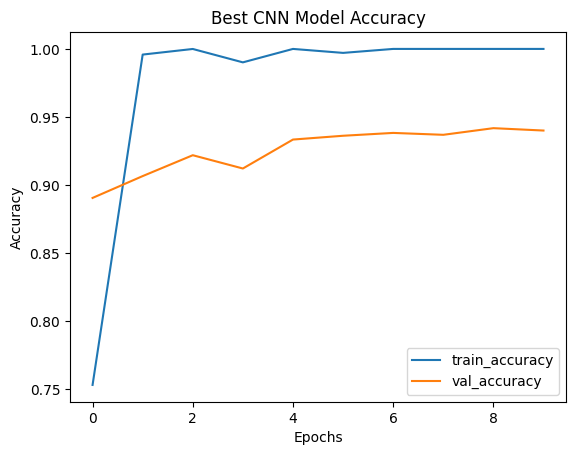

In [4]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define function to create CNN model
def create_cnn_model(optimizer, filters, kernel_size):
    model = Sequential([
        Conv2D(filters, (kernel_size, kernel_size), activation='relu', input_shape=(32, 32, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(filters*2, (kernel_size, kernel_size), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(25, activation='softmax')  # Change the number of units to 25
    ])
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Define hyperparameter grid
param_grid = {
    'optimizer': ['adam', 'sgd'],
    'filters': [32, 64],
    'kernel_size': [3],
    'batch_size': [32],
    'epochs': [10]
}

# Perform grid search
best_accuracy = 0
best_params = None
for params in ParameterGrid(param_grid):
    print(f"Training with params: {params}")
    optimizer = Adam() if params['optimizer'] == 'adam' else SGD()
    model = create_cnn_model(optimizer, params['filters'], params['kernel_size'])
    history = model.fit(X_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], validation_data=(X_val, y_val), verbose=0)
    val_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
    print(f"Validation accuracy: {val_accuracy}")
    
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_params = params

print(f"Best params: {best_params} with accuracy: {best_accuracy}")

# Plot learning curves for the best model
optimizer = Adam() if best_params['optimizer'] == 'adam' else SGD()
model = create_cnn_model(optimizer, best_params['filters'], best_params['kernel_size'])
history = model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'], validation_data=(X_val, y_val), verbose=1)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Best CNN Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
